In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining parameters
u1 = 2.0  # En m/s

m1 = 3.0
m2 = 1.0
M = m1/m2

r1 = 0.1 # En m
r2 = 0.2

k = 0.5
e = 0.8

I1 = k*m1*r1**2
I2 = k*m2*r2**2

mu = 0.1

G = (r1*m1)/(r2*m2)
#print(G)

In [3]:
def GetM(theta):

    M_ = [
            #[-mu*np.cos(theta),mu*np.sin(theta)+np.cos(theta), 0,0,0,0 ],
            [np.sin(theta), np.cos(theta), -np.sin(theta), -np.cos(theta), 1, 1],
            [0, M, 0, 1, 0, 0],
            [M, 0, 1, 0, 0, 0],
            [-np.cos(theta), np.sin(theta), np.cos(theta), -np.sin(theta), 0, 0],
            [np.sin(theta), np.cos(theta), 0, 0, -k, 0],
            [0, 0, np.sin(theta), np.cos(theta), 0, k]
    ]
    
    M_ = np.array(M_)
    
    return M_

def Getb(theta):
    b = [
        #[u1*(np.sin(theta)-mu*np.cos(theta))],
        [0],
        [0],
        [M*u1],
        [e*u1*np.cos(theta)],
        [u1*np.sin(theta)],
        [0]
      ]

    b = np.array(b)
    return b

def Angle(theta):
    return theta*np.pi/180.

def GetVelocity(v):
    
    v1 = np.sqrt( v[0]**2 + v[1]**2 )
    v2 = np.sqrt( v[2]**2 + v[3]**2 )
    theta1 = np.arctan2(v[1],v[0])*180/np.pi 
    theta2 = np.arctan2(v[3],v[2])*180/np.pi 
    
    return np.array([v1,theta1,v2,theta2,v[4],v[5]])

In [4]:
print(GetM(Angle(0)))

[[ 0.   1.  -0.  -1.   1.   1. ]
 [ 0.   3.   0.   1.   0.   0. ]
 [ 3.   0.   1.   0.   0.   0. ]
 [-1.   0.   1.  -0.   0.   0. ]
 [ 0.   1.   0.   0.  -0.5  0. ]
 [ 0.   0.   0.   1.   0.   0.5]]


In [5]:
np.linalg.det(GetM(Angle(48.60)))

12.000000000000005

In [6]:
s = np.linalg.solve(GetM(Angle(48.60)),Getb(Angle(48.60)))
s = GetVelocity(s)
print(s)

[[  1.55575011]
 [ 13.52245099]
 [  1.82450734]
 [-36.73740244]
 [ -0.25003702]
 [ -0.75011107]]


In [7]:
# Buscando varios estados finales
theta = np.linspace(0.,90.,20)

Sol = np.zeros((6,len(theta)))

for i in range(len(theta)):
    #print(i)
    
    s = np.linalg.solve( GetM(Angle(theta[i])),Getb(Angle(theta[i]))  )
    s = GetVelocity(s) # Cambiamos a magnitud y direccion
    Sol[:,i] = s.T

In [8]:
# Cada fila son las cantidades fisicas
v1 = Sol[0,:]
theta1 = Sol[1,:]
v2 = Sol[2,:]
theta2 = Sol[3,:]
w1 = Sol[4,:]/r1
w2 = Sol[5,:]/r2


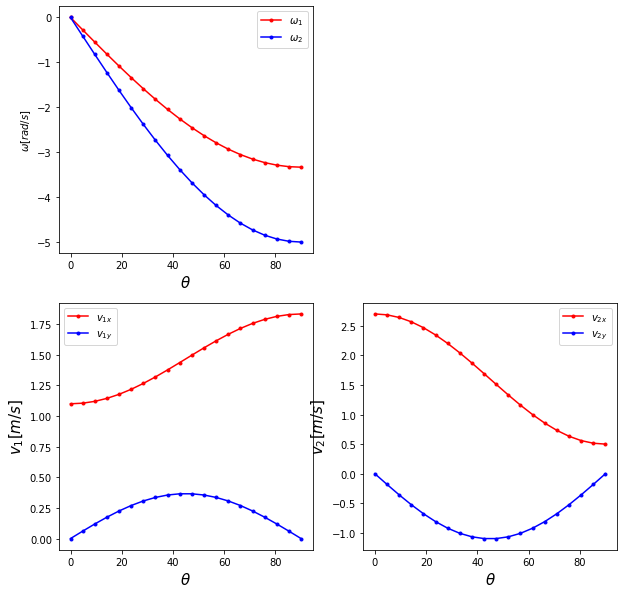

In [9]:
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

ax1.plot(theta, w1, '.-', color='r', label = r'$\omega_{1}$')
ax1.plot(theta, w2, '.-', color='b', label = r'$\omega_{2}$')
ax1.set_xlabel(r'$\theta$', fontsize=15)
ax1.set_ylabel(r'$\omega[rad/s]$')
ax1.legend()

ax2.plot(theta, v1*np.cos(Angle(theta1)), '.-', color='r',label = r'$v_{1x}$')
ax2.plot(theta, v1*np.sin(Angle(theta1)), '.-', color='b',label = r'$v_{1y}$')
ax2.set_xlabel(r'$\theta$',fontsize=15)
ax2.set_ylabel(r'$v_{1}[m/s]$',fontsize=15)
ax2.legend()

ax3.plot(theta, v2*np.cos(Angle(theta2)), '.-', color='r', label = r'$v_{2x}$')
ax3.plot(theta, v2*np.sin(Angle(theta2)), '.-', color='b', label = r'$v_{2y}$')
ax3.set_xlabel(r'$\theta$',fontsize=15)
ax3.set_ylabel(r'$v_{2}[m/s]$',fontsize=15)
ax3.legend()

#plt.savefig('variables.pdf')

In [10]:
# Momento lineal
px0 = np.zeros(len(theta))
px0[:] = m1*u1
py0 = np.zeros(len(theta))
py0[:] = 0.

pxf = m1*v1*np.cos(Angle(theta1)) + m2*v2*np.cos(Angle(theta2))
pyf = m1*v1*np.sin(Angle(theta1)) + m2*v2*np.sin(Angle(theta2))



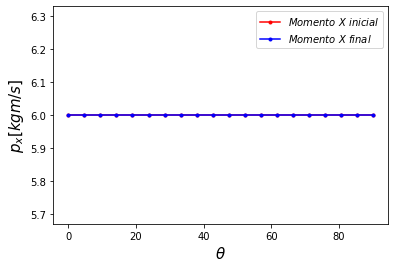

In [17]:
plt.plot(theta,px0,'.-', color='r', label = r'$Momento \ X \  inicial$')
plt.plot(theta,pxf,'.-', color='b', label = r'$Momento \ X \  final$')
plt.xlabel(r'$\theta$',fontsize=15)
plt.ylabel(r'$p_{x}[kg m/s]$',fontsize=15)
plt.legend(loc=0)
#plt.savefig('px.pdf')

(-1, 1)

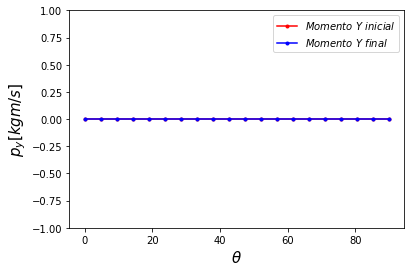

In [12]:
plt.plot(theta,py0,'.-', color='r',label = r'$Momento \ Y \  inicial$')
plt.plot(theta,pyf,'.-', color='b',label = r'$Momento \ Y \  final$')
plt.xlabel(r'$\theta$',fontsize=15)
plt.ylabel(r'$p_{y}[kg m/s]$',fontsize=15)
plt.legend(loc=0)
plt.ylim(-1,1)
#plt.savefig('py.pdf')

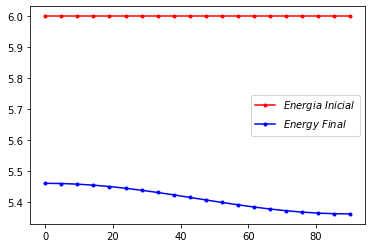

In [13]:
E0 = np.zeros(len(theta))
E0[:] = 0.5*m1*u1**2

Ef = 0.5*m1*(v1**2) + \
     0.5*m2*(v2**2) + \
     0.5*I1*w1**2 + \
     0.5*I2*w1**2

plt.plot(theta,E0,'.-', color='r',label = r'$Energia \ Inicial$')
plt.plot(theta,Ef,'.-', color='b',label = r'$Energy \ Final$')
plt.legend(loc=0)
#plt.savefig('energy.pdf')

In [14]:
# momento angular

L10 = np.zeros(len(theta))
L1f = np.zeros(len(theta))
L20 = np.zeros(len(theta))
L2f = np.zeros(len(theta))

for i in range(len(theta)):
    
 
    # Momento angular inicial
    L10[i] = -m1*r1*u1*np.sin(Angle(theta[i])) 
    L1f[i] = I1*w1[i] - m1*r1*(v1[i]*np.sin(Angle(theta[i])+Angle(theta1[i]))) 
    
    
    L20[i] = 0.
    L2f[i] = I2*w2[i] + m2*r2*(v2[i]*np.sin(Angle(theta[i])+Angle(theta2[i])))

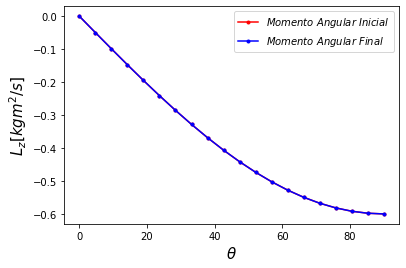

In [15]:
plt.plot(theta,L10,'.-', color='r',label = r'$Momento \ Angular \ Inicial$')
plt.plot(theta,L1f,'.-', color='b',label = r'$Momento \ Angular \ Final$')
plt.xlabel(r'$\theta$',fontsize=15)
plt.ylabel(r'$L_{z}[kg m^{2}/s]$',fontsize=15)
plt.legend(loc=1)
#plt.savefig('Lz.pdf')

(-1, 1)

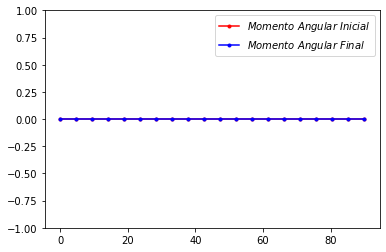

In [16]:
plt.plot(theta,L20,'.-', color='r',label = r'$Momento \ Angular \ Inicial$')
plt.plot(theta,L2f,'.-', color='b',label = r'$Momento \ Angular \ Final$')
plt.legend(loc=1)
plt.ylim(-1,1)